In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from matplotlib import pyplot

N = 10
batch_size = 30
epochs = 1

In [2]:
df = pd.read_csv('Yahoo.csv')
for i in range(df.shape[0]):
    df['Vol'].loc[i] = df['Vol'].loc[i].replace(',','')

year =[]
for i in range(df.shape[0]):
    year.append(df['Date'].loc[i][-4:])
df.insert(0, 'Year', year, True)

df['Date']= pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True, ascending=True)
df.head()

C:\Users\cjjwh\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Year,Unnamed: 0,Date,Open,High,Low,Close,AdjClose,Vol
1217,2015,1217,2015-01-02,1.2967,1.3067,1.2967,1.3067,1.1668,288000
1216,2015,1216,2015-01-05,1.3067,1.3100,1.3000,1.3100,1.1697,729000
1215,2015,1215,2015-01-06,1.3133,1.3133,1.2933,1.3100,1.1697,1275000
1214,2015,1214,2015-01-07,1.3067,1.3133,1.2900,1.2900,1.1519,462000
1213,2015,1213,2015-01-08,1.2933,1.3000,1.2767,1.2800,1.1429,1635000


### Sorting Data into Train, CV and Test Sets

In [3]:
len_2019 = int(len(df[df['Year']=='2019'][['Date','AdjClose']]))
cutoff_cv = int(len_2019/2)
df_2019 = df[df['Year']=='2019'][['Date','AdjClose']].copy()


cv = df_2019[0:cutoff_cv][['Date', 'AdjClose']]
test = df_2019[cutoff_cv:len_2019][['Date', 'AdjClose']].copy()
train = df[df['Year']<'2019'][['Date','AdjClose']].copy()

# Get sizes of each of the datasets
num_cv = int(len(cv))
num_test = len(test)
num_train = len(train)

train_cv = df[:num_train+num_cv][['Date', 'AdjClose']]
num_train_cv = len(train_cv)


print("num_train = ",num_train)
print("num_cv = ", num_cv)
print("num_test = ",num_test)

print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train =  968
num_cv =  125
num_test =  125
train.shape = (968, 2)
cv.shape = (125, 2)
train_cv.shape = (1093, 2)
test.shape = (125, 2)


In [4]:
#Scaling training data
#StandardScaler(): Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler() 
train_scaled = scaler.fit_transform(np.array(train['AdjClose']).reshape(-1,1))

x, y = [], []
data = train_scaled
for i in range(N, len(data)):
    x.append(data[i-N:i])
    y.append(data[i])
x_train_scaled = np.array(x)
y_train_scaled = np.array(y)

In [5]:
#Scaling X of CV, not scaling Y (date)
data = np.array(train_cv['AdjClose']).reshape(-1,1)
x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
offset = num_train
#Considering the past N days into the mu_cv and std_cv lists
for i in range(offset, len(data)):
    mu_cv_list.append(np.mean(data[i-N:i]))
    std_cv_list.append(np.std(data[i-N:i]))
    x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
    y_cv.append(data[i])

#Split X and Y converted into array
x_cv_scaled = np.array(x_cv_scaled)
y_cv = np.array(y_cv)

print("x_cv_scaled.shape = " + str(x_cv_scaled.shape))
print("y_cv.shape = " + str(y_cv.shape))
print("len(mu_cv_list) = " + str(len(mu_cv_list)))
print("len(std_cv_list) = " + str(len(std_cv_list)))

x_cv_scaled.shape = (125, 10, 1)
y_cv.shape = (125, 1)
len(mu_cv_list) = 125
len(std_cv_list) = 125


In [6]:
scaler_final = StandardScaler()
train_cv_scaled_final = scaler_final.fit_transform(np.array(train_cv['AdjClose']).reshape(-1,1))
print("scaler_final.mean_ = " + str(scaler_final.mean_))
print("scaler_final.var_ = " + str(scaler_final.var_))

scaler_final.mean_ = [1.21599771]
scaler_final.var_ = [0.02323779]


In [7]:
#Scaling X of Test, not scaling Y (date)
data = np.array(df['AdjClose']).reshape(-1,1)

x_test_scaled, y_test, mu_test_list, std_test_list = [], [], [], []
offset = num_train + num_cv
for i in range(offset, len(data)):
    mu_test_list.append(np.mean(data[i-N:i]))
    std_test_list.append(np.std(data[i-N:i]))
    x_test_scaled.append((data[i-N:i]-mu_test_list[i-offset])/std_test_list[i-offset])
    y_test.append(data[i])

#Split X and Y converted into array
x_test_scaled = np.array(x_test_scaled)
y_test = np.array(y_test)

print("x_test_scaled.shape = " + str(x_test_scaled.shape))
print("y_test.shape = " + str(y_test.shape))
print("len(mu_test_list) = " + str(len(mu_test_list)))
print("len(std_test_list) = " + str(len(std_test_list)))

x_test_scaled.shape = (125, 10, 1)
y_test.shape = (125, 1)
len(mu_test_list) = 125
len(std_test_list) = 125


### Building LSTM

In [8]:
#Sequential model is a linear stack of layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import keras
from tqdm import tqdm_notebook

import time

Using TensorFlow backend.


In [9]:
#Model with 3 middle layers, and each with a dropout_prob
#Dropout reduces over-fitting of data on the training set
regressior = Sequential()
regressior.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape =(x_train_scaled.shape[1],1)))
regressior.add(Dropout(0.2))

#add another layer:
regressior.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
regressior.add(Dropout(0.2)) #0.3 provide better generalisation

#add another layer:
regressior.add(LSTM(units = 80, activation= 'relu'))
regressior.add(Dropout(0.2))

#Final layer
regressior.add(Dense(units=1))

In [10]:
#regressior.summary()

In [11]:
regressior.compile(optimizer='nadam', loss='mean_squared_error')
history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)

Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.4508


In [12]:
est_scaled = regressior.predict(x_cv_scaled)
est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
rmse = mean_squared_error(y_cv, est)

def get_mape(y_cv, est):
    y_cv, y_pred = np.array(y_cv), np.array(est)
    return np.mean(np.abs(y_cv-est)/(y_cv))*100

mape = get_mape(y_cv, est)
print(rmse, mape)

0.0003757524535875691 1.3786888097058538


Text(0, 0.5, 'USD')

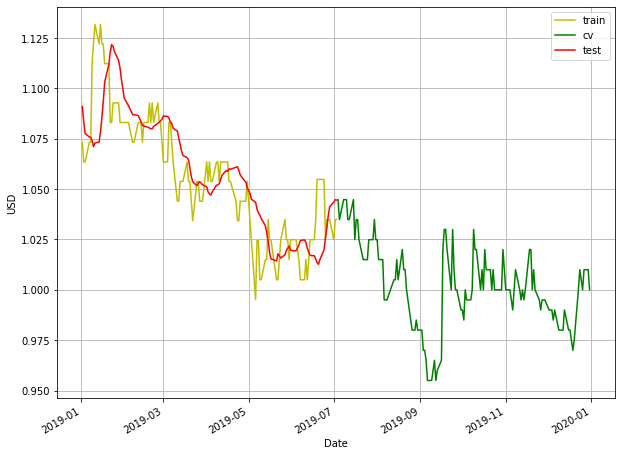

In [13]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est.reshape(-1), 
                       'y_cv': y_cv.reshape(-1),
                       'Date': cv['Date']})

#ax = df.plot(grid=True, figsize=(10,8))
#ax = train.plot(x='Date', y='AdjClose', style='b-', grid=True)
ax = cv.plot(x='Date', y='AdjClose', style='y-', grid=True)
ax = test.plot(x='Date', y='AdjClose', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test', 'est'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [14]:
est_scaled_test = regressior.predict(x_test_scaled)
est_test = (est_scaled_test*np.array(std_test_list).reshape(-1,1)) + np.array(mu_test_list).reshape(-1,1)
rmse = mean_squared_error(y_test, est_test)

def get_mape(y_test, est_test):
    y_test, y_pred = np.array(y_test), np.array(est_test)
    return np.mean(np.abs(y_test-est_test)/(y_cv))*100

mape = get_mape(y_test, est_test)
print(rmse, mape)

0.00036650917811756686 1.3481474115324956


Text(0, 0.5, 'USD')

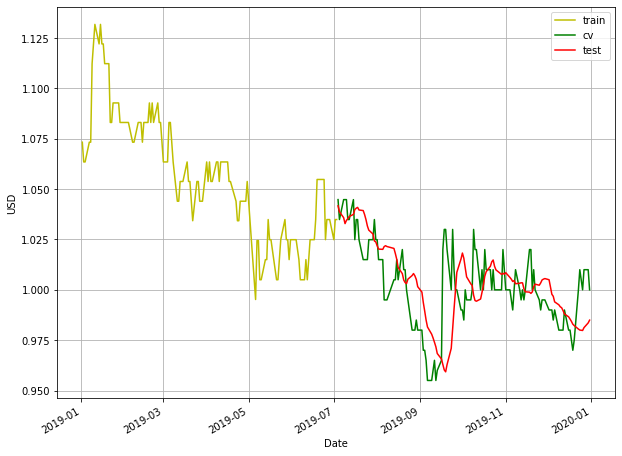

In [15]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df_test = pd.DataFrame({'est_test': est_test.reshape(-1),
                            'Date': df[num_train+num_cv: len(df)]['Date']})

#ax = df.plot(grid=True, figsize=(10,8))
#ax = train.plot(x='Date', y='AdjClose', style='b-', grid=True)
ax = cv.plot(x='Date', y='AdjClose', style='y-', grid=True)
ax = test.plot(x='Date', y='AdjClose', style='g-', grid=True, ax=ax)
ax = est_df_test.plot(x='Date', y='est_test', style='r-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test', 'predictions'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")

## Tuning Parameters: N

In [16]:
param_label = 'N'
param_list = range(1, 20)

error_rate_N = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()

for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x, y = [], []
    data = train_scaled
    for i in range(N, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x_train_scaled = np.array(x)
    y_train_scaled = np.array(y)

    # Split cv into x and y
    data = np.array(train_cv['AdjClose']).reshape(-1,1)
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
    offset = num_train
    for i in range(offset, len(data)):
        mu_cv_list.append(np.mean(data[i-N:i]))
        std_cv_list.append(np.std(data[i-N:i]))
        x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
        y_cv.append(data[i])
    x_cv_scaled = np.array(x_cv_scaled)
    y_cv = np.array(y_cv)
    
    # Train, predict and eval model
    regressior.compile(optimizer='nadam', loss='mean_squared_error')
    history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)
    est_scaled = regressior.predict(x_cv_scaled)
    est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    rmse = mean_squared_error(y_cv, est)
    
    
    # Collect results
    error_rate_N[param_label].append(param)
    error_rate_N['rmse'].append(rmse)
    error_rate_N['mape_pct'].append(mape)
    
error_rate_N = pd.DataFrame(error_rate_N)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate_N

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0774
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0657
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0594
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0550
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0588
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0551
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0524
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0530
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0492
Train on 958 samples
958/958 [==============================] - 3s 3ms/sample - loss: 0.0486
Train on 958 samples
958/958 [==============================] - 3s 3ms

,N,rmse,mape_pct
0,1,0.000371,1.348147
1,2,0.000363,1.348147
2,3,0.000338,1.348147
3,4,0.000330,1.348147
4,5,0.000322,1.348147
5,6,0.000324,1.348147
6,7,0.000310,1.348147
7,8,0.000298,1.348147
8,9,0.000291,1.348147
9,10,0.000290,1.348147


Text(0, 0.5, 'RMSE/MAPE(%)')

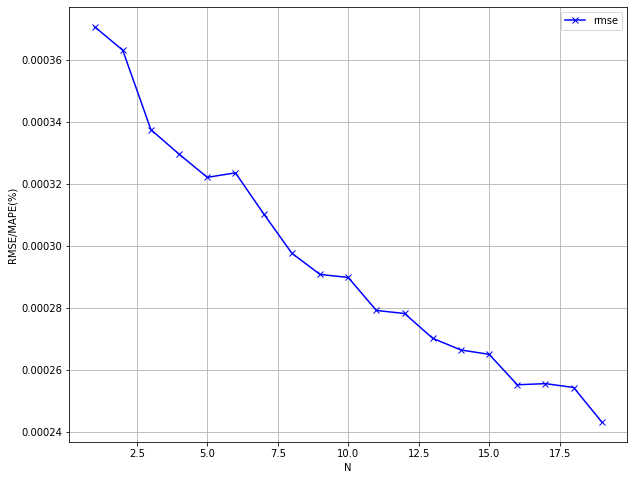

In [17]:
# Plot RMSE 
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate_N.plot(x='N', y='rmse', style='bx-', grid=True)
#ax = error_rate.plot(x='N', y='mape_pct', style='rx-', grid=True, ax=ax)
ax.set_xlabel("N")
ax.set_ylabel("RMSE/MAPE(%)")

In [18]:
error_min_N = error_rate_N[error_rate_N['rmse']== error_rate_N['rmse'].min()]
N_opt = error_min_N['N'].values[0]
print(error_min_N)
print("min RMSE = %0.3f" % error_rate_N['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate_N['mape_pct'].min())
print("optimum " + param_label + " = " + str(N_opt))

N = int(N_opt)

     N      rmse  mape_pct
18  19  0.000243  1.348147
min RMSE = 0.000
min MAPE = 1.348%
optimum N = 19


In [21]:
len_2019 = int(len(df[df['Year']=='2019'][['Date','AdjClose']]))
cutoff_cv = int(len_2019/2)
df_2019 = df[df['Year']=='2019'][['Date','AdjClose']].copy()


cv = df_2019[0:cutoff_cv][['Date', 'AdjClose']]
test = df_2019[cutoff_cv:len_2019][['Date', 'AdjClose']].copy()
train = df[df['Year']<'2019'][['Date','AdjClose']].copy()
num_cv = int(len(cv))
num_test = len(test)
num_train = len(train)

train_cv = df[:num_train+num_cv][['Date', 'AdjClose']]
num_train_cv = len(train_cv)

cv_test = cv[-N:][['Date', 'AdjClose']].append(test)
num_cv_test = len(cv_test)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train['AdjClose']).reshape(-1,1))


regressior = Sequential()
regressior.add(LSTM(units = 50, activation= 'relu', return_sequences= True, input_shape =(x_train_scaled.shape[1],1)))
regressior.add(Dropout(0.2))

#add another layer:
regressior.add(LSTM(units = 60, activation= 'relu', return_sequences= True))
regressior.add(Dropout(0.2)) #0.3 provide better generalisation
#add another layer:
regressior.add(LSTM(units = 80, activation= 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units=1))

## Tuning Parameters: Epochs

In [22]:
param_label = 'epochs'
param_list = [1, 10, 20, 30, 40, 50]

error_rate_epochs = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()


for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x, y = [], []
    data = train_scaled
    for i in range(N, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x_train_scaled = np.array(x)
    y_train_scaled = np.array(y)

    # Split cv into x and y
    data = np.array(train_cv['AdjClose']).reshape(-1,1)
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
    offset = num_train
    for i in range(offset, len(data)):
        mu_cv_list.append(np.mean(data[i-N:i]))
        std_cv_list.append(np.std(data[i-N:i]))
        x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
        y_cv.append(data[i])
    x_cv_scaled = np.array(x_cv_scaled)
    y_cv = np.array(y_cv)
    
    
    # Train, predict and eval model
    regressior.compile(optimizer='nadam', loss='mean_squared_error')
    history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)
    est_scaled = regressior.predict(x_cv_scaled)
    est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    rmse = mean_squared_error(y_cv, est)
    
    
    # Collect results
    error_rate_epochs[param_label].append(param)
    error_rate_epochs['rmse'].append(rmse)
    error_rate_epochs['mape_pct'].append(mape)
    
error_rate_epochs = pd.DataFrame(error_rate_epochs)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate_epochs

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.3681
Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.0987
Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.0777
Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.0679
Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.0665
Train on 949 samples
949/949 [==============================] - 3s 3ms/sample - loss: 0.0583

Minutes taken = 0.3146176775296529


,epochs,rmse,mape_pct
0,1,0.000434,1.348147
1,10,0.000407,1.348147
2,20,0.000361,1.348147
3,30,0.000380,1.348147
4,40,0.000335,1.348147
5,50,0.000309,1.348147


Text(0, 0.5, 'RMSE/MAPE(%)')

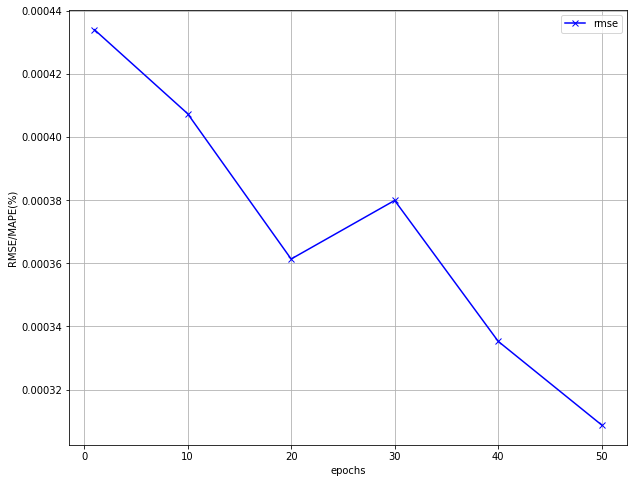

In [23]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate_epochs.plot(x='epochs', y='rmse', style='bx-', grid=True)
ax.set_xlabel("epochs")
ax.set_ylabel("RMSE/MAPE(%)")

In [24]:
error_min_epochs = error_rate_epochs[error_rate_epochs['rmse']== error_rate_epochs['rmse'].min()]
epochs_opt = error_min_epochs['epochs'].values[0]
print(error_min_epochs)
print("min RMSE = %0.3f" % error_rate_epochs['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate_epochs['mape_pct'].min())
print("optimum " + param_label + " = " + str(epochs_opt))
epochs = epochs_opt

   epochs      rmse  mape_pct
5      50  0.000309  1.348147
min RMSE = 0.000
min MAPE = 1.348%
optimum epochs = 50


## Tuning Parameters: Batch Size

In [25]:
param_label = 'batch_size'
param_list = [8, 16, 32, 64, 128]

error_rate_bs = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x, y = [], []
    data = train_scaled
    for i in range(N, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x_train_scaled = np.array(x)
    y_train_scaled = np.array(y)

    # Split cv into x and y
    data = np.array(train_cv['AdjClose']).reshape(-1,1)
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
    offset = num_train
    for i in range(offset, len(data)):
        mu_cv_list.append(np.mean(data[i-N:i]))
        std_cv_list.append(np.std(data[i-N:i]))
        x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
        y_cv.append(data[i])
    x_cv_scaled = np.array(x_cv_scaled)
    y_cv = np.array(y_cv)
    
    # Train, predict and eval model
    regressior.compile(optimizer='nadam', loss='mean_squared_error')
    history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)
    est_scaled = regressior.predict(x_cv_scaled)
    est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    rmse = mean_squared_error(y_cv, est)
    
    
    # Collect results
    error_rate_bs[param_label].append(param)
    error_rate_bs['rmse'].append(rmse)
    error_rate_bs['mape_pct'].append(mape)
    
error_rate_bs = pd.DataFrame(error_rate_bs)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate_bs

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0593
Epoch 2/50
949/949 [==============================] - 1s 555us/sample - loss: 0.0511
Epoch 3/50
949/949 [==============================] - 1s 560us/sample - loss: 0.0550
Epoch 4/50
949/949 [==============================] - 1s 559us/sample - loss: 0.0493
Epoch 5/50
949/949 [==============================] - 1s 561us/sample - loss: 0.0456
Epoch 6/50
949/949 [==============================] - 1s 561us/sample - loss: 0.0450
Epoch 7/50
949/949 [==============================] - 1s 570us/sample - loss: 0.0427
Epoch 8/50
949/949 [==============================] - 1s 561us/sample - loss: 0.0441
Epoch 9/50
949/949 [==============================] - 1s 573us/sample - loss: 0.0431
Epoch 10/50
949/949 [==============================] - 1s 570us/sample - loss: 0.0433
Epoch 11/50
949/949 [==============================] - 1s 566us/sample - loss: 0.0384
Epoch 12/50
949/949 [=======================

949/949 [==============================] - 1s 581us/sample - loss: 0.0206
Epoch 41/50
949/949 [==============================] - 1s 578us/sample - loss: 0.0209
Epoch 42/50
949/949 [==============================] - 1s 571us/sample - loss: 0.0205
Epoch 43/50
949/949 [==============================] - 1s 578us/sample - loss: 0.0205
Epoch 44/50
949/949 [==============================] - 1s 570us/sample - loss: 0.0206
Epoch 45/50
949/949 [==============================] - 1s 572us/sample - loss: 0.0195
Epoch 46/50
949/949 [==============================] - 1s 577us/sample - loss: 0.0198
Epoch 47/50
949/949 [==============================] - 1s 577us/sample - loss: 0.0187
Epoch 48/50
949/949 [==============================] - 1s 575us/sample - loss: 0.0208
Epoch 49/50
949/949 [==============================] - 1s 575us/sample - loss: 0.0206
Epoch 50/50
949/949 [==============================] - 1s 573us/sample - loss: 0.0192
Train on 949 samples
Epoch 1/50
949/949 [=========================

,batch_size,rmse,mape_pct
0,8,0.000172,1.348147
1,16,0.000176,1.348147
2,32,0.000185,1.348147
3,64,0.000220,1.348147
4,128,0.000278,1.348147


Text(0, 0.5, 'RMSE/MAPE(%)')

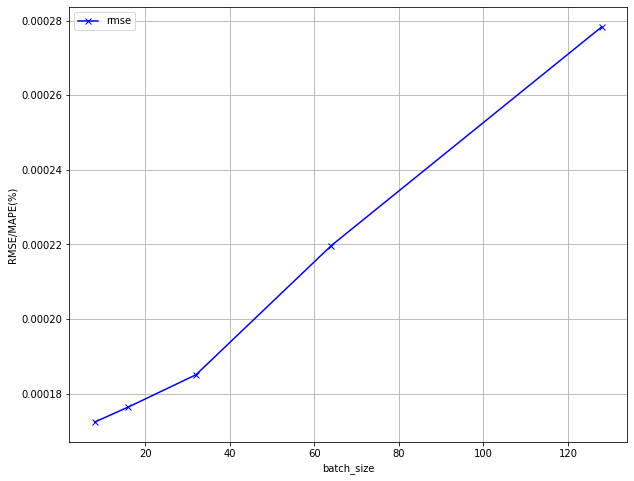

In [26]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate_bs.plot(x='batch_size', y='rmse', style='bx-', grid=True)
ax.set_xlabel("batch_size")
ax.set_ylabel("RMSE/MAPE(%)")

In [27]:
error_min_bs = error_rate_bs[error_rate_bs['rmse']== error_rate_bs['rmse'].min()]
bs_opt = error_min_bs['batch_size'].values[0]
print(error_min_bs)
print("min RMSE = %0.3f" % error_rate_bs['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate_bs['mape_pct'].min())
print("optimum " + param_label + " = " + str(bs_opt))
batch_size = bs_opt

   batch_size      rmse  mape_pct
0           8  0.000172  1.348147
min RMSE = 0.000
min MAPE = 1.348%
optimum batch_size = 8


In [28]:
param_label = 'lstm_units'
param_list = [10, 50, 64, 128]

param2_label = 'dropout_prob'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9]

error_rate_lu = {param_label: [], param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()

for param in tqdm_notebook(param_list):
    for param2 in tqdm_notebook(param2_list):
        x, y = [], []
        data = train_scaled
        for i in range(N, len(data)):
            x.append(data[i-N:i])
            y.append(data[i])
        x_train_scaled = np.array(x)
        y_train_scaled = np.array(y)

        # Split cv into x and y
        data = np.array(train_cv['AdjClose']).reshape(-1,1)
        x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
        offset = num_train
        for i in range(offset, len(data)):
            mu_cv_list.append(np.mean(data[i-N:i]))
            std_cv_list.append(np.std(data[i-N:i]))
            x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
            y_cv.append(data[i])
        x_cv_scaled = np.array(x_cv_scaled)
        y_cv = np.array(y_cv)
        
        regressior = Sequential()
        regressior.add(LSTM(units = param, return_sequences= True, input_shape =(x_train_scaled.shape[1],1)))
        regressior.add(Dropout(param2))
        #add another layer:
        regressior.add(LSTM(units = param, return_sequences= True))
        regressior.add(Dropout(param2))
        #add another layer:
        regressior.add(LSTM(units = param))
        regressior.add(Dropout(param2))
        regressior.add(Dense(units=1))
    
        # Train, predict and eval model
        regressior.compile(optimizer='nadam', loss='mean_squared_error')
        history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)
        est_scaled = regressior.predict(x_cv_scaled)
        est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
        rmse = mean_squared_error(y_cv, est)
        
        error_rate_lu[param_label].append(param)
        error_rate_lu[param2_label].append(param2)
        error_rate_lu['rmse'].append(rmse)
        error_rate_lu['mape_pct'].append(mape)
    
error_rate_lu = pd.DataFrame(error_rate_lu)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate_lu

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 5s 5ms/sample - loss: 0.4317
Epoch 2/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1955
Epoch 3/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1931
Epoch 4/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1600
Epoch 5/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1618
Epoch 6/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1692
Epoch 7/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1572
Epoch 8/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1470
Epoch 9/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1532
Epoch 10/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1386
Epoch 11/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1523
Epoch 12/50
949/949 [==============================] - 2s 2ms/sa

949/949 [==============================] - 2s 2ms/sample - loss: 0.3569
Epoch 36/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3090
Epoch 37/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3427
Epoch 38/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3328
Epoch 39/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3376
Epoch 40/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3337
Epoch 41/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3462
Epoch 42/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3533
Epoch 43/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3154
Epoch 44/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3537
Epoch 45/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3390
Epoch 46/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3376
Epoc

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 5s 6ms/sample - loss: 0.1513
Epoch 2/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0973
Epoch 3/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0853
Epoch 4/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0780
Epoch 5/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0785
Epoch 6/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0696
Epoch 7/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0654
Epoch 8/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0622
Epoch 9/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0623
Epoch 10/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0574
Epoch 11/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0569
Epoch 12/50
949/949 [==============================] - 2s 2ms/sa

949/949 [==============================] - 2s 2ms/sample - loss: 0.1213
Epoch 46/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1140
Epoch 47/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1154
Epoch 48/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1179
Epoch 49/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1159
Epoch 50/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1175
Train on 949 samples
Epoch 1/50
949/949 [==============================] - 5s 6ms/sample - loss: 0.4486
Epoch 2/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3254
Epoch 3/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.2857
Epoch 4/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.2703
Epoch 5/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.2486
Epoch 6/50
949/949 [==============================] - 2s 2ms/sample - lo

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 5s 5ms/sample - loss: 0.1469
Epoch 2/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0874 
Epoch 3/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0792
Epoch 4/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0711
Epoch 5/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0685
Epoch 6/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0634
Epoch 7/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0541
Epoch 8/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0575
Epoch 9/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0534 0s - 
Epoch 10/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0490
Epoch 11/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0499
Epoch 12/50
949/949 [==============================] - 2s

949/949 [==============================] - 2s 2ms/sample - loss: 0.1000
Epoch 44/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0949 0s
Epoch 45/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0957
Epoch 46/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0990
Epoch 47/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0980
Epoch 48/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.1054
Epoch 49/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0961
Epoch 50/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.0916
Train on 949 samples
Epoch 1/50
949/949 [==============================] - 5s 6ms/sample - loss: 0.4356
Epoch 2/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.3003
Epoch 3/50
949/949 [==============================] - 2s 2ms/sample - loss: 0.2611
Epoch 4/50
949/949 [==============================] - 2s 2ms/sample

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 6s 6ms/sample - loss: 0.1213
Epoch 2/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0789
Epoch 3/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0703
Epoch 4/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0556
Epoch 5/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0526
Epoch 6/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0474
Epoch 7/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0486
Epoch 8/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0484
Epoch 9/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0439
Epoch 10/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0407
Epoch 11/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0432
Epoch 12/50
949/949 [==============================] - 3s 3ms/sa

949/949 [==============================] - 3s 3ms/sample - loss: 0.0727
Epoch 46/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0715
Epoch 47/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0712
Epoch 48/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0702
Epoch 49/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0745
Epoch 50/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0697
Train on 949 samples
Epoch 1/50
949/949 [==============================] - 6s 7ms/sample - loss: 0.3015
Epoch 2/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.2438
Epoch 3/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.2091
Epoch 4/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.2042
Epoch 5/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.1862
Epoch 6/50
949/949 [==============================] - 3s 3ms/sample - lo

,lstm_units,dropout_prob,rmse,mape_pct
0,10,0.5,0.000208,1.348147
1,10,0.6,0.000242,1.348147
2,10,0.7,0.000263,1.348147
3,10,0.8,0.000293,1.348147
4,10,0.9,0.000377,1.348147
5,50,0.5,0.000151,1.348147
6,50,0.6,0.000157,1.348147
7,50,0.7,0.000184,1.348147
8,50,0.8,0.000197,1.348147
9,50,0.9,0.000273,1.348147


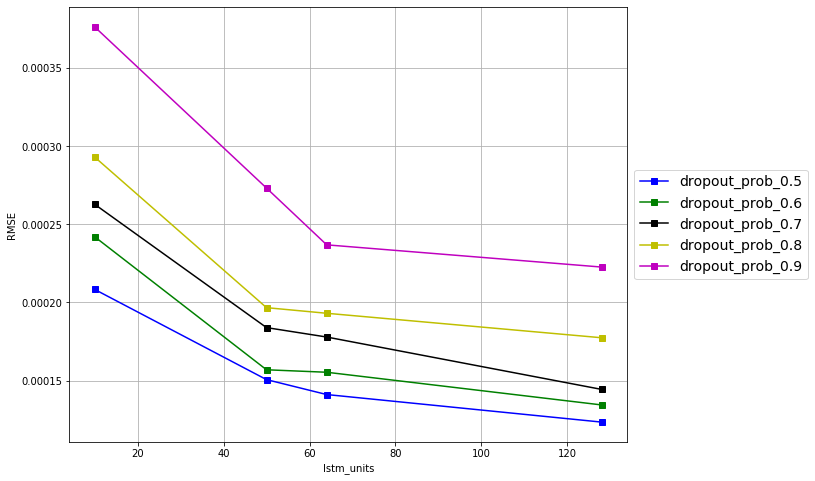

In [29]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp =  error_rate_lu[error_rate_lu[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate_lu[error_rate_lu[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5))

In [30]:
temp = error_rate_lu[error_rate_lu['rmse'] == error_rate_lu['rmse'].min()]
lstm_units_opt = temp[param_label].values[0]
dropout_prob_opt = temp[param2_label].values[0]
print("min RMSE = %0.3f" % error_rate_lu['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate_lu['mape_pct'].min())
print("optimum " + param_label + " = " + str(lstm_units_opt))
print("optimum " + param2_label + " = " + str(dropout_prob_opt))
lstm_units = lstm_units_opt
dropout_prob = dropout_prob_opt

min RMSE = 0.000
min MAPE = 1.348%
optimum lstm_units = 128
optimum dropout_prob = 0.5


In [31]:
param_label = 'optimizer'
param_list = ['adam', 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam']

error_rate_o = {param_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
    
    # Split train into x and y
    x, y = [], []
    data = train_scaled
    for i in range(N, len(data)):
        x.append(data[i-N:i])
        y.append(data[i])
    x_train_scaled = np.array(x)
    y_train_scaled = np.array(y)

    # Split cv into x and y
    data = np.array(train_cv['AdjClose']).reshape(-1,1)
    x_cv_scaled, y_cv, mu_cv_list, std_cv_list = [], [], [], []
    offset = num_train
    for i in range(offset, len(data)):
        mu_cv_list.append(np.mean(data[i-N:i]))
        std_cv_list.append(np.std(data[i-N:i]))
        x_cv_scaled.append((data[i-N:i]-mu_cv_list[i-offset])/std_cv_list[i-offset])
        y_cv.append(data[i])
    x_cv_scaled = np.array(x_cv_scaled)
    y_cv = np.array(y_cv)
    
    regressior = Sequential()
    regressior.add(LSTM(units = lstm_units, return_sequences= True, input_shape =(x_train_scaled.shape[1],1)))
    regressior.add(Dropout(dropout_prob))
    #add another layer:
    regressior.add(LSTM(units = lstm_units, return_sequences= True))
    regressior.add(Dropout(dropout_prob)) 
    #add another layer:
    regressior.add(LSTM(units = lstm_units))
    regressior.add(Dropout(dropout_prob))
    regressior.add(Dense(units=1))
    
    # Train, predict and eval model
    regressior.compile(optimizer=param, loss='mean_squared_error')
    history = regressior.fit(x_train_scaled, y_train_scaled, epochs=epochs_opt, batch_size=batch_size, verbose=1)
    est_scaled = regressior.predict(x_cv_scaled)
    est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
    rmse = mean_squared_error(y_cv, est)
    
    
    # Collect results
    error_rate_o[param_label].append(param)
    error_rate_o['rmse'].append(rmse)
    error_rate_o['mape_pct'].append(mape)
    
error_rate_o = pd.DataFrame(error_rate_o)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate_o

C:\Users\cjjwh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


Train on 949 samples
Epoch 1/50
949/949 [==============================] - 6s 6ms/sample - loss: 0.1077
Epoch 2/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0744
Epoch 3/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0610
Epoch 4/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0585
Epoch 5/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0526
Epoch 6/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0471
Epoch 7/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0509
Epoch 8/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0433
Epoch 9/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0438
Epoch 10/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0419
Epoch 11/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0437
Epoch 12/50
949/949 [==============================] - 3s 3ms/sa

949/949 [==============================] - 3s 3ms/sample - loss: 0.0468
Epoch 46/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0464
Epoch 47/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0519
Epoch 48/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0478
Epoch 49/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0499
Epoch 50/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.0466
Train on 949 samples
Epoch 1/50
949/949 [==============================] - 6s 6ms/sample - loss: 0.9536
Epoch 2/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.9073
Epoch 3/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.8528
Epoch 4/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.8042
Epoch 5/50
949/949 [==============================] - 3s 3ms/sample - loss: 0.7530
Epoch 6/50
949/949 [==============================] - 3s 3ms/sample - lo

,optimizer,rmse,mape_pct
0,adam,0.000121,1.348147
1,sgd,0.000306,1.348147
2,rmsprop,0.000121,1.348147
3,adagrad,0.000325,1.348147
4,adadelta,0.000473,1.348147
5,adamax,0.000157,1.348147
6,nadam,0.000126,1.348147


  optimizer      rmse  mape_pct
0      adam  0.000121  1.348147
min RMSE = 0.000
min MAPE = 1.348%
optimum optimizer = 19


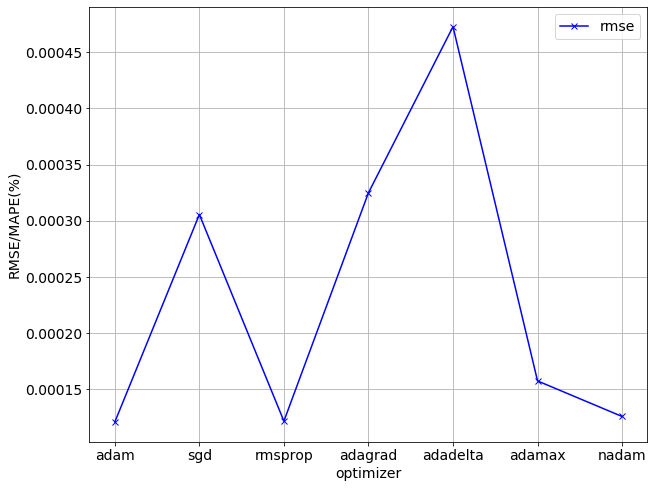

In [32]:
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = error_rate_o.plot(x='optimizer', y='rmse', style='bx-', grid=True)
ax.set_xlabel("optimizer")
ax.set_ylabel("RMSE/MAPE(%)")

error_min_o = error_rate_o[error_rate_o['rmse']== error_rate_o['rmse'].min()]
o_opt = error_min_o['optimizer'].values[0]
print(error_min_o)
print("min RMSE = %0.3f" % error_rate_lu['rmse'].min())
print("min MAPE = %0.3f%%" % error_rate_lu['mape_pct'].min())
print("optimum " + param_label + " = " + str(N_opt))

## With Tuned Parameters

In [33]:
#Cross-Val with Tuned Model
est_scaled = regressior.predict(x_cv_scaled)
est = (est_scaled*np.array(std_cv_list).reshape(-1,1)) + np.array(mu_cv_list).reshape(-1,1)
rmse = mean_squared_error(y_cv, est)

def get_mape(y_cv, est):
    y_cv, y_pred = np.array(y_cv), np.array(est)
    return np.mean(np.abs(y_cv-est)/(y_cv))*100

mape = get_mape(y_cv, est)
print(rmse, mape)

0.00012556510401781341 0.7999856021659455


Text(0, 0.5, 'USD')

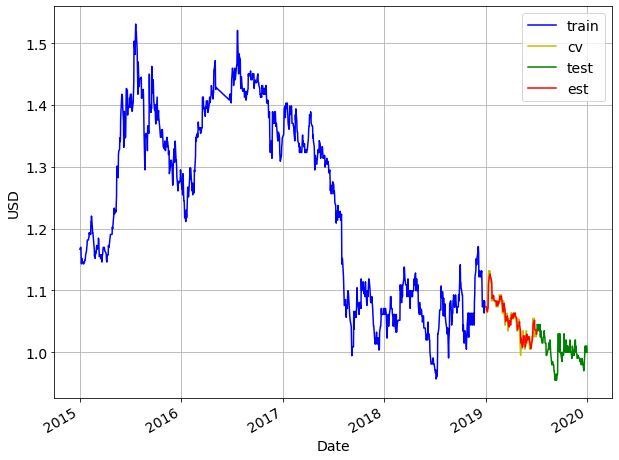

In [34]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est.reshape(-1), 
                       'y_cv': y_cv.reshape(-1),
                       'Date': cv['Date']})

#ax = df.plot(grid=True, figsize=(10,8))
ax = train.plot(x='Date', y='AdjClose', style='b-', grid=True)
ax = cv.plot(x='Date', y='AdjClose', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='AdjClose', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='Date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'cv', 'test', 'est'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")

In [35]:
#Rescaling Test Data to new N Value
data = np.array(df['AdjClose']).reshape(-1,1)
x_test_scaled, y_test, mu_test_list, std_test_list = [], [], [], []
offset = num_train + num_cv
for i in range(offset, len(data)):
    mu_test_list.append(np.mean(data[i-N:i]))
    std_test_list.append(np.std(data[i-N:i]))
    x_test_scaled.append((data[i-N:i]-mu_test_list[i-offset])/std_test_list[i-offset])
    y_test.append(data[i])
x_test_scaled = np.array(x_test_scaled)
y_test = np.array(y_test)

print("x_test_scaled.shape = " + str(x_test_scaled.shape))
print("y_test.shape = " + str(y_test.shape))
print("len(mu_test_list) = " + str(len(mu_test_list)))
print("len(std_test_list) = " + str(len(std_test_list)))

x_test_scaled.shape = (125, 19, 1)
y_test.shape = (125, 1)
len(mu_test_list) = 125
len(std_test_list) = 125


In [36]:
#Predicting Test Set with Tuned Model
est_scaled_test = regressior.predict(x_test_scaled)
est_test = (est_scaled_test*np.array(std_test_list).reshape(-1,1)) + np.array(mu_test_list).reshape(-1,1)
rmse = mean_squared_error(y_test, est_test)

def get_mape(y_test, est_test):
    y_test, y_pred = np.array(y_test), np.array(est_test)
    return np.mean(np.abs(y_test-est_test)/(y_cv))*100

mape = get_mape(y_test, est_test)
print(rmse, mape)

0.0001309960487820099 0.7763428854093726


Text(0, 0.5, 'USD')

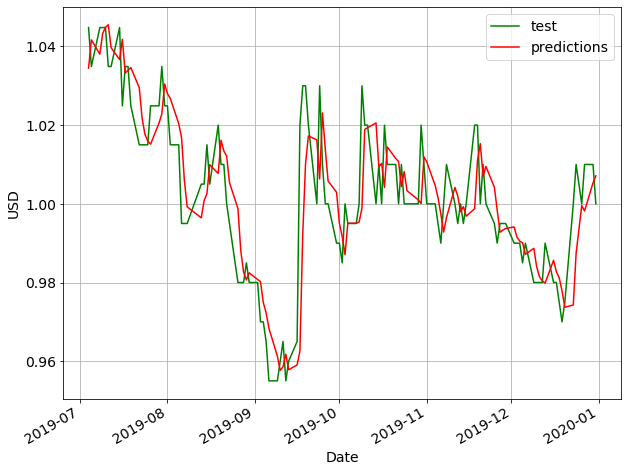

In [37]:
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df_test = pd.DataFrame({'est_test': est_test.reshape(-1),
                            'Date': df[num_train+num_cv: len(df)]['Date']})

#ax = df.plot(grid=True, figsize=(10,8))
#ax = train.plot(x='Date', y='AdjClose', style='b-', grid=True)
#ax = cv.plot(x='Date', y='AdjClose', style='y-', grid=True, ax=ax)
ax = test.plot(x='Date', y='AdjClose', style='g-', grid=True)
ax = est_df_test.plot(x='Date', y='est_test', style='r-', grid=True, ax=ax)
ax.legend(['test', 'predictions'])
ax.set_xlabel("Date")
ax.set_ylabel("USD")